In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.8.1+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.8)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.8")   # need to manually install torch 1.8 if Colab changes its default version
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html


In [3]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

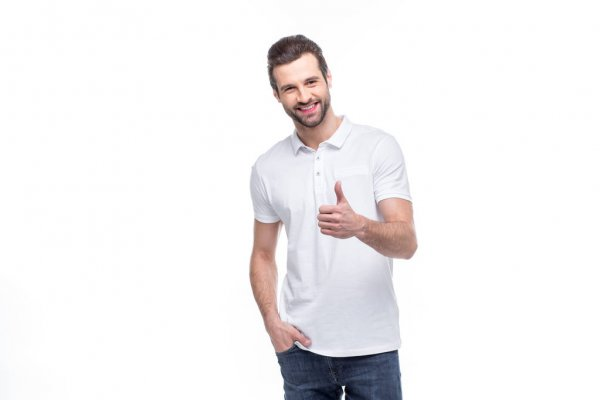

In [4]:
im = cv2.imread("./person.jpg")
cv2_imshow(im)

In [5]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

tensor([0], device='cuda:0')
Boxes(tensor([[247.1892,  28.5473, 419.0197, 399.2990]], device='cuda:0'))
defaultdict(<class 'list'>, {'person': [(31, 292), (31, 293), (31, 294), (31, 295), (31, 296), (31, 297), (31, 298), (31, 299), (31, 300), (32, 290), (32, 291), (32, 292), (32, 293), (32, 294), (32, 295), (32, 296), (32, 297), (32, 298), (32, 299), (32, 300), (32, 301), (32, 302), (32, 303), (33, 289), (33, 290), (33, 291), (33, 292), (33, 293), (33, 294), (33, 295), (33, 296), (33, 297), (33, 298), (33, 299), (33, 300), (33, 301), (33, 302), (33, 303), (33, 304), (33, 305), (34, 288), (34, 289), (34, 290), (34, 291), (34, 292), (34, 293), (34, 294), (34, 295), (34, 296), (34, 297), (34, 298), (34, 299), (34, 300), (34, 301), (34, 302), (34, 303), (34, 304), (34, 305), (35, 287), (35, 288), (35, 289), (35, 290), (35, 291), (35, 292), (35, 293), (35, 294), (35, 295), (35, 296), (35, 297), (35, 298), (35, 299), (35, 300), (35, 301), (35, 302), (35, 303), (35, 304), (35, 305), (35, 306)

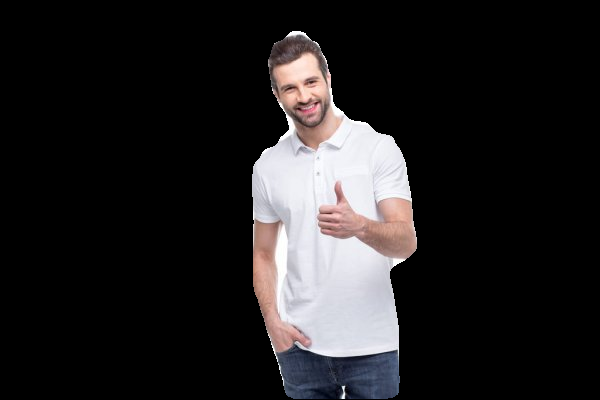

In [7]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
#useful piece of code to group together points of same class
import numpy
import numpy as np
import cv2
from collections import defaultdict
d=defaultdict(list)
for ind,data in enumerate(outputs["instances"].pred_classes):
  num=data.item()
  class_name=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[num]
  mask=outputs['instances'].pred_masks[ind]
  mask_np=mask.detach().cpu().numpy()
  true_mask=(numpy.where(mask_np ==True))
  listOfCoordinates= list(zip(true_mask[0],true_mask[1]))
  d[class_name]+=listOfCoordinates
print(d)  
pts=[]
for i,j in d['person']:
  pts.append([j,i])
pts = np.array(pts, dtype=np.int32)

mask = np.zeros((im.shape[0], im.shape[1]))

cv2.fillConvexPoly(mask, pts, 1)
mask = mask.astype(np.bool)

out = np.zeros_like(im)
out[mask] = im[mask]
cv2_imshow(out)

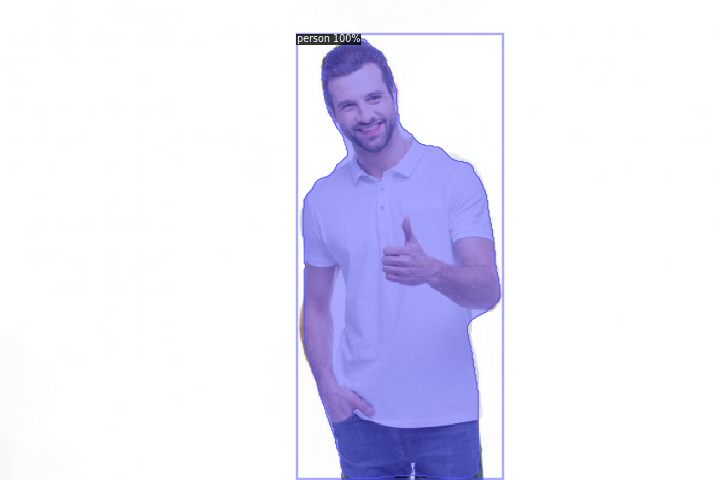

In [8]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

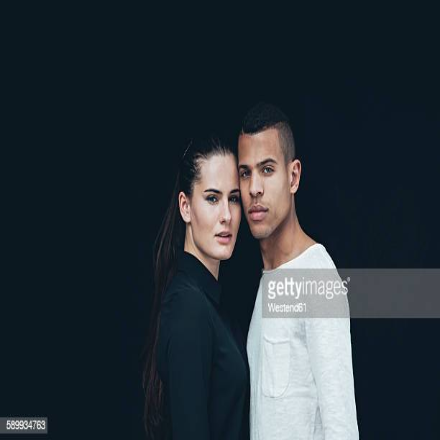

In [20]:
im1 = cv2.imread("./1.jpg")

im1=cv2.resize(im1,(440, 440))
cv2_imshow(im1)

In [23]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im1)

tensor([0, 0], device='cuda:0')
Boxes(tensor([[139.3266, 139.4586, 255.2424, 439.5602],
        [232.9849, 103.8682, 359.0290, 436.7664]], device='cuda:0'))
person [(148, 211), (148, 212), (148, 213), (148, 214), (148, 215), (148, 216), (148, 217), (148, 218), (148, 219), (148, 220), (148, 221), (148, 222), (148, 223), (148, 224), (149, 206), (149, 207), (149, 208), (149, 209), (149, 210), (149, 211), (149, 212), (149, 213), (149, 214), (149, 215), (149, 216), (149, 217), (149, 218), (149, 219), (149, 220), (149, 221), (149, 222), (149, 223), (149, 224), (149, 225), (149, 226), (149, 227), (150, 201), (150, 202), (150, 203), (150, 204), (150, 205), (150, 206), (150, 207), (150, 208), (150, 209), (150, 210), (150, 211), (150, 212), (150, 213), (150, 214), (150, 215), (150, 216), (150, 217), (150, 218), (150, 219), (150, 220), (150, 221), (150, 222), (150, 223), (150, 224), (150, 225), (150, 226), (150, 227), (150, 228), (150, 229), (151, 197), (151, 198), (151, 199), (151, 200), (151, 2

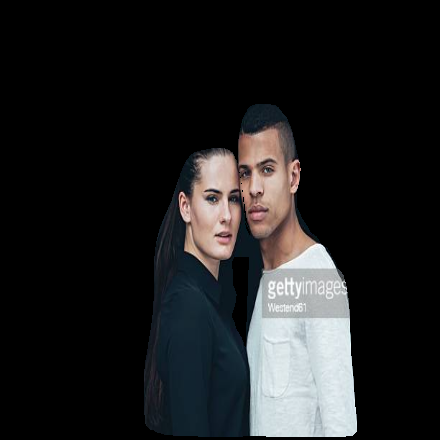

In [24]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)
#useful piece of code to group together points of same class
import numpy
import numpy as np
import cv2
from collections import defaultdict
d=defaultdict(list)
for ind,data in enumerate(outputs["instances"].pred_classes):
  num=data.item()
  class_name=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[num]
  mask=outputs['instances'].pred_masks[ind]
  mask_np=mask.detach().cpu().numpy()
  true_mask=(numpy.where(mask_np ==True))
  listOfCoordinates= list(zip(true_mask[0],true_mask[1]))
  print(class_name,listOfCoordinates)
  d[class_name]+=listOfCoordinates
print(d)  
pts=[]
for i,j in d['person']:
  pts.append([j,i])
pts = np.array(pts, dtype=np.int32)

mask = np.zeros((im1.shape[0], im1.shape[1]))

cv2.fillConvexPoly(mask, pts, 1)
mask = mask.astype(np.bool)

out = np.zeros_like(im1)
out[mask] = im1[mask]
cv2_imshow(out)

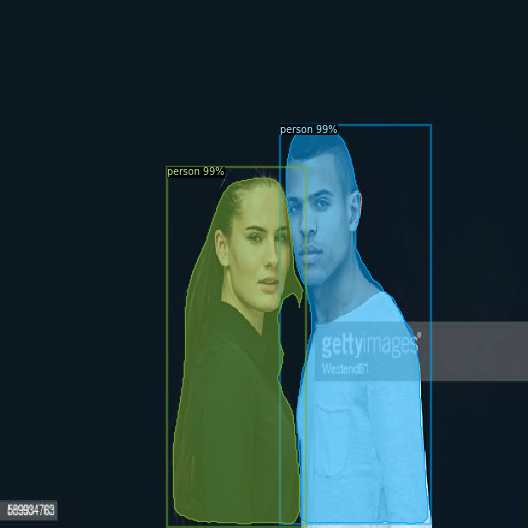

In [26]:
v = Visualizer(im1[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])